In [ ]:
%load_ext autoreload
%autoreload 2
import data
import data_prepro as pre 
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import scienceplots
from pathlib import Path
import portfolio_trade as pt


In [ ]:
df = data.load_process()

In [ ]:
df.columns

In [ ]:
!pwd

In [ ]:
%cd ..

In [ ]:
data_dir = Path.cwd()/'data'

df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

In [ ]:
df_dict['10']

In [ ]:
sp500ret = pd.read_csv('/Users/minhquangngo/documents/vsc/erasmus/msc_thesis/data/sp500daily_ret_2018.csv')

In [ ]:
sp500ret = sp500ret.iloc[:-1, :]
sp500ret.shape

In [14]:
sp500ret.shape

(250, 1)

In [ ]:
sp500ret.index = pd.to_datetime(sp500ret['DlyCalDt'])
sp500ret = sp500ret.drop(columns=['DlyCalDt'])
sp500ret.head()

In [ ]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'unconstrained',return_type= 'ret')._weighted_portfolios()

In [ ]:
weighted_portfolio_excess = pt.weighted_portfolio_returns(weight_mode = 'unconstrained',return_type= 'excess_ret')._weighted_portfolios()

In [23]:
import numpy as np
np.std(weighted_portfolio_excess[2])


0.010228088234380211

In [37]:
np.mean(weighted_portfolio_returns)

2.6804206486284573e-05

In [49]:
# Create a DataFrame from weighted_portfolio_returns tuple
weighted_portfolio_df = pd.DataFrame({
    f'portfolio_{i+1}': arr for i, arr in enumerate(weighted_portfolio_returns)
})

# Align the index with sp500ret
weighted_portfolio_df.index = sp500ret.index[:len(weighted_portfolio_df)]

# Join with sp500ret DataFrame
combined_df = sp500ret.join(weighted_portfolio_df)

combined_df.head()

,sprtrn,portfolio_1,portfolio_2,portfolio_3,portfolio_4,portfolio_5,portfolio_6,portfolio_7,portfolio_8
DlyCalDt,,,,,,,,,
2018-01-02,0.008303,0.006639,0.004539,0.006957,0.006957,0.007576,0.005737,0.005504,0.004565
2018-01-03,0.006399,0.006584,0.006030,0.001680,0.001497,0.005477,0.001200,0.005477,-0.000771
2018-01-04,0.004029,0.007758,0.008842,-0.003604,0.002010,0.002010,-0.006011,0.007758,-0.004033
2018-01-05,0.007034,0.007178,0.007178,0.005333,0.003525,0.007178,0.003488,0.007178,0.003525
2018-01-08,0.001662,0.009479,0.009479,0.002997,0.002997,0.002997,0.002997,0.002997,0.009479


In [ ]:
# Filter combined_df to only include data from the first half of 2018
combined_df_half_2018 = combined_df.loc['2018-01-01':'2018-09-30']
combined_df_half_2018.head()

In [50]:
combined_df.plot(figsize=(12, 6), title="Combined DataFrame Columns", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='best')
plt.show()

KeyboardInterrupt: 

In [ ]:
# # Calculate cumulative returns of 'sprtrn'
# combined_df_half_2018['sprtrn_cumret'] = (1 + combined_df['sprtrn']).cumprod() - 1
# combined_df_half_2018[['sprtrn', 'sprtrn_cumret']].head()

# # Get cumulative return at the end of the year as a percentage
# end_of_year_cumret = combined_df_half_2018['sprtrn_cumret'].iloc[-1] * 100
# print(f"Cumulative return at end of year: {end_of_year_cumret:.2f}%")

In [52]:
# Calculate cumulative returns for all 8 portfolios in combined_df
for col in [f'portfolio_{i+1}' for i in range(8)]:
    combined_df[f'{col}_cumret'] = (1 + combined_df[col]).cumprod() - 1

# Display the last cumulative return value for each portfolio
for col in [f'portfolio_{i+1}' for i in range(8)]:
    cumret = combined_df[f'{col}_cumret'].iloc[-2] * 100  # use -2 because last row is NaN
    print(f"Cumulative return for {col}: {cumret:.2f}%")

Cumulative return for portfolio_1: 3.67%
Cumulative return for portfolio_2: -3.73%
Cumulative return for portfolio_3: 2.66%
Cumulative return for portfolio_4: 0.05%
Cumulative return for portfolio_5: -10.46%
Cumulative return for portfolio_6: 5.33%
Cumulative return for portfolio_7: -5.22%
Cumulative return for portfolio_8: 4.46%


<unknown>:55: SyntaxWarning: invalid escape sequence '\&'
<unknown>:151: SyntaxWarning: invalid escape sequence '\&'
<unknown>:55: SyntaxWarning: invalid escape sequence '\&'
<unknown>:151: SyntaxWarning: invalid escape sequence '\&'
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif not isinstance(ast_elt, (ast.Ellipsis, ast.Pass)):
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif not isinstance(ast_elt, (ast.Ellipsis, ast.Pass)):
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.C

org order:
ols_en_c4f, ols_base_ff5, ols_base_c4f, rf_base_ff5, rf_base_c4f, ols_en_ff5,rf_en_ff5, rf_en_c4f

best perform ols: 
ols_en_ff5,ols_en_c4f,ols_base_c4f,ols_base_ff5

best perform rf:
rf_en_c4f,rf_base_ff5,rf_base_ff5,rf_en_ff5,rf_base c4f

fixed order: rf_en_c4f, rf_base_ff5, rf_en_ff5,ols_en_ff5,rf_base_c4f,ols_en_c4f,ols_base_c4f,ols_base_ff5

In [ ]:
%cd py

In [10]:
!pwd

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis


/opt/anaconda3/envs/mscthesis/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=40959) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [11]:
%cd py

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/py


<unknown>:55: SyntaxWarning: invalid escape sequence '\&'
<unknown>:151: SyntaxWarning: invalid escape sequence '\&'
<unknown>:55: SyntaxWarning: invalid escape sequence '\&'
<unknown>:151: SyntaxWarning: invalid escape sequence '\&'
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif not isinstance(ast_elt, (ast.Ellipsis, ast.Pass)):
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif not isinstance(ast_elt, (ast.Ellipsis, ast.Pass)):
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.C

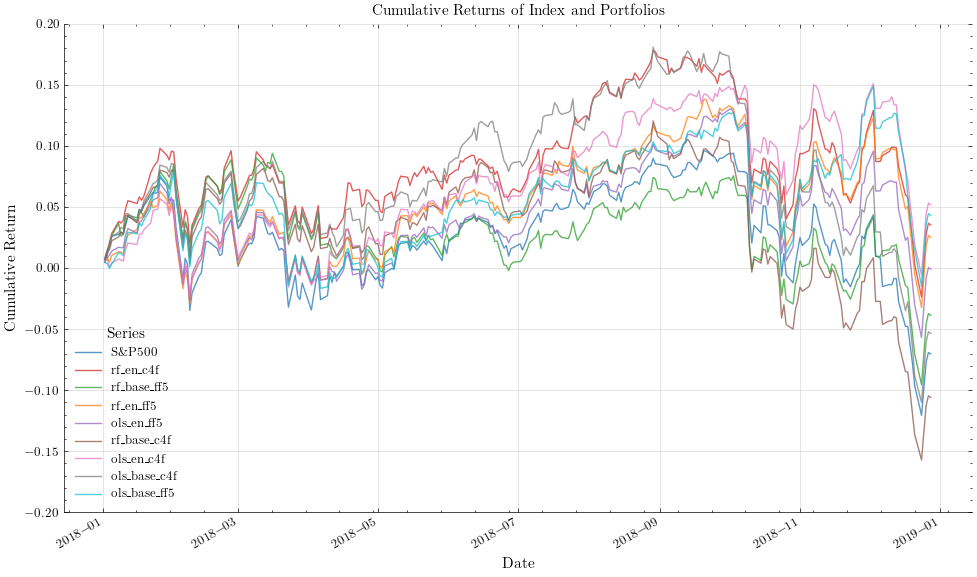

In [57]:
from returns_analysis import ReturnAnalyzer

an = ReturnAnalyzer(sp500ret, weighted_portfolio_returns,weighted_portfolio_excess)
latex = an.generate_apa_latex_table()   # -> copy into your LaTeX doc
fig   = an.plot_returns()               # -> save/show as needed

In [58]:
latex

'\n% \\usepackage{booktabs} must be included in the preamble.\n\\begin{table}[ht]\n\\centering\n\\caption*{\\textbf{Table 1}: \\textit{Descriptive Statistics of Index and Portfolio Returns}}\n\\label{tab:return_stats_1}\n\\begin{tabular}{lcccccccccc}\n\\toprule\n{} & Cumulative Return & Annualised Return & Annualised Volatility & Alpha & Sharpe Ratio & Skewness & Excess Kurtosis & PSR (S*=0) & PSR (S*=0.1) & PSR (S*=0.2) \\\\\n\\midrule\nS\\&P500 & -7.03% & -7.08% & 17.06% & 0.00% & nan & nan & nan & nan & nan & nan \\\\\nrf\\_en\\_c4f & 3.54% & 3.57% & 16.55% & 10.65% & 0.1076 & -0.6871 & 3.9196 & 0.9487 & 0.5461 & 0.0806 \\\\\nrf\\_base\\_ff5 & -3.85% & -3.89% & 16.48% & 3.20% & 0.0795 & -0.4202 & 4.0376 & 0.8908 & 0.3753 & 0.0310 \\\\\nrf\\_en\\_ff5 & 2.53% & 2.55% & 16.27% & 9.63% & 0.1055 & -0.4614 & 3.2630 & 0.9474 & 0.5335 & 0.0732 \\\\\nols\\_en\\_ff5 & -0.08% & -0.08% & 16.10% & 7.00% & 0.0963 & -0.5755 & 3.9331 & 0.9298 & 0.4772 & 0.0561 \\\\\nrf\\_base\\_c4f & -10.58% & -10.